In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# import data
my_df = pd.read_csv('data/sample_data_clustering.csv')
my_df.head()

,var1,var2
0,0.528827,0.919833
1,0.715373,0.133577
2,0.686088,0.824129
3,0.214553,0.609016
4,0.202000,0.486103


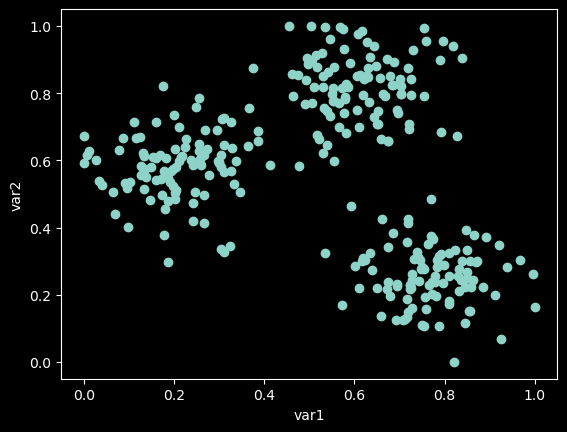

In [3]:
# plot data
plt.scatter(my_df['var1'], my_df['var2'])
plt.xlabel('var1')
plt.ylabel('var2')
plt.show()

In [4]:
# instantiate object
k_means = KMeans(n_clusters = 3)

In [5]:
# fit object to data
k_means.fit(my_df)

KMeans(n_clusters=3)

In [6]:
# add cluster labels
my_df['clusters'] = k_means.labels_
my_df.head()

,var1,var2,clusters
0,0.528827,0.919833,0
1,0.715373,0.133577,1
2,0.686088,0.824129,0
3,0.214553,0.609016,2
4,0.202000,0.486103,2


In [7]:
# display cluster value counts (clusters will not always equal)
my_df['clusters'].value_counts()

0    100
1    100
2    100
Name: clusters, dtype: int64

In [8]:
# display centroid locations
centroids = k_means.cluster_centers_
centroids_df = pd.DataFrame(centroids).rename(columns = {
    0: 'x',
    1: 'y'   
    }
)

centroids_df

,x,y
0,0.611454,0.823404
1,0.767310,0.256495
2,0.209909,0.580869


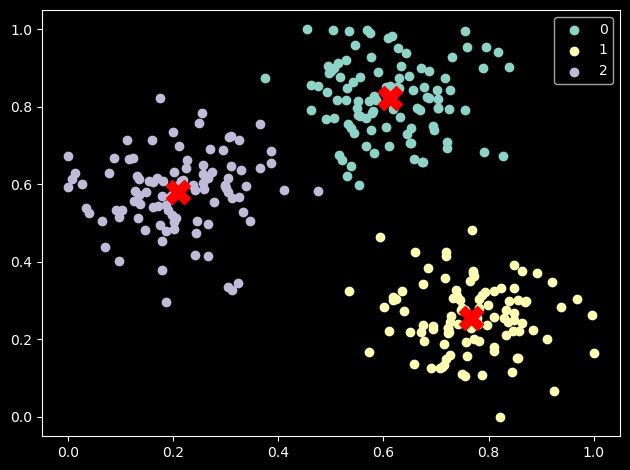

In [9]:
# plot clusters and centroids
clusters = my_df.groupby('clusters')

for cluster, data in clusters:
    plt.scatter(
        data['var1'],
        data['var2'],
        marker = 'o',
        label = cluster
    )

    plt.scatter(
        centroids[cluster, 0],
        centroids[cluster, 1],
        marker = 'X',
        color = 'red',
        s = 300
    )

plt.legend()
plt.tight_layout()
plt.show()